# Regresja liniowa (Tensorflow)

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
X = np.arange(0.0, 5.0, 0.1)
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

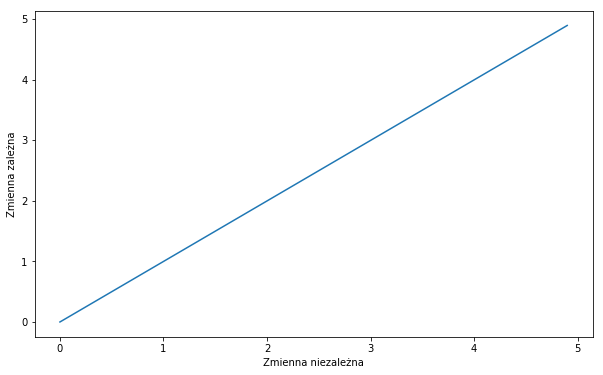

In [10]:
a = 1
b = 0

y = a*X + b

plt.plot(X, y)
plt.ylabel(u'Zmienna zależna')
plt.xlabel(u'Zmienna niezależna')
plt.show()

## A teraz dla odmiany użyjemy Tensorflow

In [11]:
x_data = np.random.rand(100).astype(np.float32)

In [12]:
y_data = x_data * 3 + 2
# Sprawdzić tę wektoryzację
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)
# Dodajemy randomowy szum

# Tworzenie krotek 
zip(x_data, y_data)[0:5]

[(0.30647218, 2.9927023884349868),
 (0.91317463, 4.7137713065605658),
 (0.1277702, 2.3246560018290907),
 (0.1909837, 2.7639195197234803),
 (0.20011695, 2.5747831434239403)]

In [13]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [14]:
# Wyznaczamy funkcję kosztu
loss = tf.reduce_mean(tf.square(y - y_data))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [16]:
init = tf.initialize_all_variables()

In [17]:
session = tf.Session()

In [18]:
session.run(init)

In [ ]:
# Optymalizujemy w pętli dodając ciąglę nowe przykłady
# Tak jakbyśmy trenowali sieć neuronową

train_data = []
for step in range(100):
    evals = session.run([train, a, b])[1:]
    if step % 5 == 0:
        print step, evals
        train_data.append(evals)
        
        

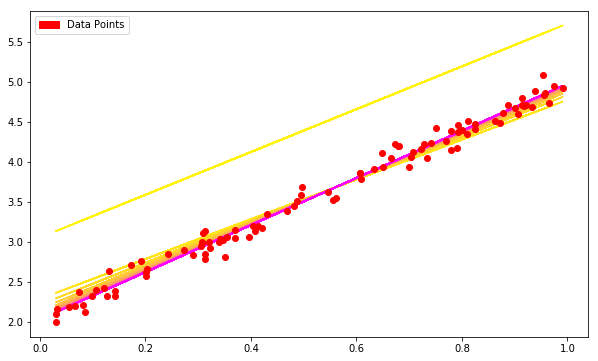

In [21]:
# Jak widzimy, rozwiązanie coraz bardziej zbliża się
# do  tj.: 3.0 i 2.0
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr, cg, cb))
plt.plot(x_data, y_data, 'ro')

green_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line])
plt.show()

    